In [1]:
# CIND820 Big Data Analytics Project 
# Machine learning (ML) techniques to predict the price of used cars 
#Predictive analytics on Kijiji dataset

# Student Name: Yoseph Tiruneh, Abdi
# Student Number: 501147225




In [2]:
# Package/Library

In [3]:
import csv
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular import *
%matplotlib inline

import glob
from scipy import stats
from scipy.stats import norm
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm
#importing  Sklear methods
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 



from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as rmse
from sklearn import preprocessing

from patsy import dmatrices
from scipy.stats import norm
from scipy import stats



In [4]:
## Data collection and preprocessing 

In [5]:
import pandas as pd
CarD=pd.read_csv("C:/Users/tirut/OneDrive/Documents/Personal/Ryarson Unversity/CIND820 Project/Final Theme/AdData.csv") 
CarD.head()


AdID                     city  latitude  longitude  mapAddress  \
0  1623070279  Burnaby/New Westminster       NaN        NaN         NaN   
1  1623097429     Delta/Surrey/Langley       NaN        NaN         NaN   
2  1595531267     Delta/Surrey/Langley       NaN        NaN         NaN   
3  1623215000     Delta/Surrey/Langley       NaN        NaN         NaN   
4  1623286366     Delta/Surrey/Langley       NaN        NaN         NaN   

                                               title  price saleby  \
0                                  Suzuki Jimny 2006  14999  owner   
1                                  Mustang cobra 99   26000  owner   
2  2006 Nissan Frontier SE 4X4 - Local BC | No Ac...  13995  owner   
3                                    1985 Chevy 1500   3300  owner   
4                          2006 Volkswagen Jetta TDI   2700  owner   

         make           model  ...                  Date   visit No of door  \
0      Suzuki           other  ...  06/27/2022, 20:16:56     NaN          3   
1        Ford         mustang  ...  06/28/2022, 03:02:22  2026.0          2   
2      Nissan        frontier  ...  06/28/2022, 22:53:29   795.0          4   
3   Chevrolet  ck_pickup_1500  ...  06/29/2022, 10:30:00  1020.0          4   
4  volkswagen           jetta  ...  06/29/2022, 14:28:28  1396.0          4   

   No of seats Transmission push button start parking assist sunroof  \
0            4          1.0               NaN            NaN     NaN   
1            4          1.0               NaN            NaN     NaN   
2            5          2.0               NaN            NaN     NaN   
3            5          2.0               NaN            NaN     NaN   
4            5          1.0               NaN            NaN     NaN   

  alloy wheels  VIN  
0          NaN  NaN  
1          NaN  NaN  
2          1.0  NaN  
3          NaN  NaN  
4          NaN  NaN  

[5 rows x 28 columns]

In [6]:
# Droping  attributes not in used for the study 

CarD.drop({'AdID','latitude',"longitude", "mapAddress","Date","VIN", "Drivetrain",'model', "Trim","parking assist","push button start","alloy wheels",'sunroof'}, axis=1, inplace=True)


In [7]:
CarD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51343 entries, 0 to 51342
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          51343 non-null  object 
 1   title         51342 non-null  object 
 2   price         51343 non-null  int64  
 3   saleby        51343 non-null  object 
 4   make          51343 non-null  object 
 5   year          51343 non-null  int64  
 6   condition     51343 non-null  object 
 7   Kilometers    51343 non-null  int64  
 8   body          51343 non-null  object 
 9   fueltype      47553 non-null  object 
 10  color         48835 non-null  object 
 11  visit         50541 non-null  float64
 12  No of door    34665 non-null  object 
 13  No of seats   31829 non-null  object 
 14  Transmission  47339 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 5.9+ MB


In [8]:
#Change the name of some attirbutes to simple for compuation purpose 

CarD.rename(columns = {'No of seats':'seats'}, inplace = True)
CarD.rename(columns = {'No of door':'doors'}, inplace = True)

In [9]:
# Change Data types of the seats and doord 

CarD['seats']=pd.to_numeric(CarD['seats'], errors='coerce')
CarD['doors']=pd.to_numeric(CarD['doors'], errors='coerce')

In [10]:
# header dataset after cleaning the datset
CarD.head(5)

city                                              title  \
0  Burnaby/New Westminster                                  Suzuki Jimny 2006   
1     Delta/Surrey/Langley                                  Mustang cobra 99    
2     Delta/Surrey/Langley  2006 Nissan Frontier SE 4X4 - Local BC | No Ac...   
3     Delta/Surrey/Langley                                    1985 Chevy 1500   
4     Delta/Surrey/Langley                          2006 Volkswagen Jetta TDI   

   price saleby        make  year condition  Kilometers          body  \
0  14999  owner      Suzuki  2006      used       37600         wagon   
1  26000  owner        Ford  1999      used        5000  coupe_2_door   
2  13995  owner      Nissan  2006      used      227000  pickup_truck   
3   3300  owner   Chevrolet  1985      used      180000  pickup_truck   
4   2700  owner  volkswagen  2006      used      307000         sedan   

  fueltype   color   visit  doors  seats  Transmission  
0      gas   black     NaN    3.0    4.0           1.0  
1      NaN   black  2026.0    2.0    4.0           1.0  
2      gas   black   795.0    4.0    5.0           2.0  
3      gas    blue  1020.0    4.0    5.0           2.0  
4   diesel  silver  1396.0    4.0    5.0           1.0

In [11]:
# Exploration analysis 

profile=ProfileReport(CarD, title="Kjiji Car sales Profile Report", html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Drop highly correlcted attributes Transmisission, Door and Color the graph is in explotory analysis in the above question

CarD.drop({'color'}, axis=1, inplace=True)

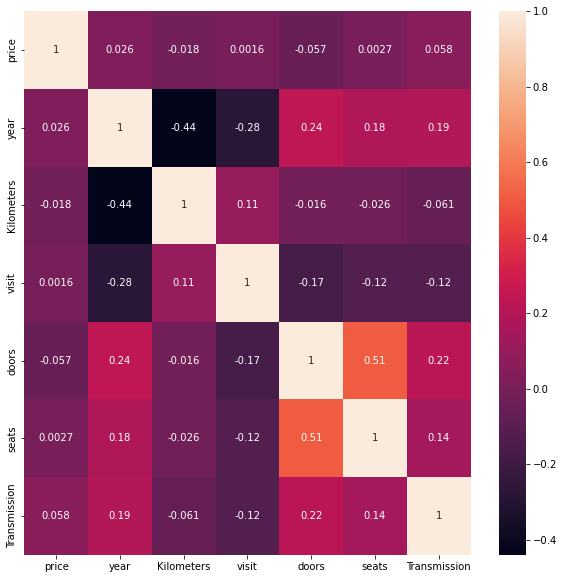

In [13]:

#Checking the correlation after droped some attributes 
plt.figure(figsize=(10,10))
sns.heatmap(CarD.corr(), annot=True)

plt.show()

In [14]:
CarD.describe()

price          year    Kilometers         visit         doors  \
count  5.134300e+04  51343.000000  5.134300e+04  50541.000000  34596.000000   
mean   3.719879e+04   2015.561459  9.773170e+04    294.065333      3.808302   
std    4.422589e+05      6.877405  1.400040e+05    858.379622      0.689455   
min    0.000000e+00   1900.000000  0.000000e+00      0.000000      2.000000   
25%    1.357000e+04   2013.000000  1.516850e+04     15.000000      4.000000   
50%    2.929500e+04   2017.000000  7.594700e+04     75.000000      4.000000   
75%    4.999500e+04   2021.000000  1.500000e+05    261.000000      4.000000   
max    1.000000e+08   2023.000000  9.999999e+06  54064.000000      6.000000   

              seats  Transmission  
count  31646.000000  47339.000000  
mean       5.084750      1.929994  
std        1.112004      0.295730  
min        1.000000      0.000000  
25%        5.000000      2.000000  
50%        5.000000      2.000000  
75%        5.000000      2.000000  
max       44.000000      3.000000

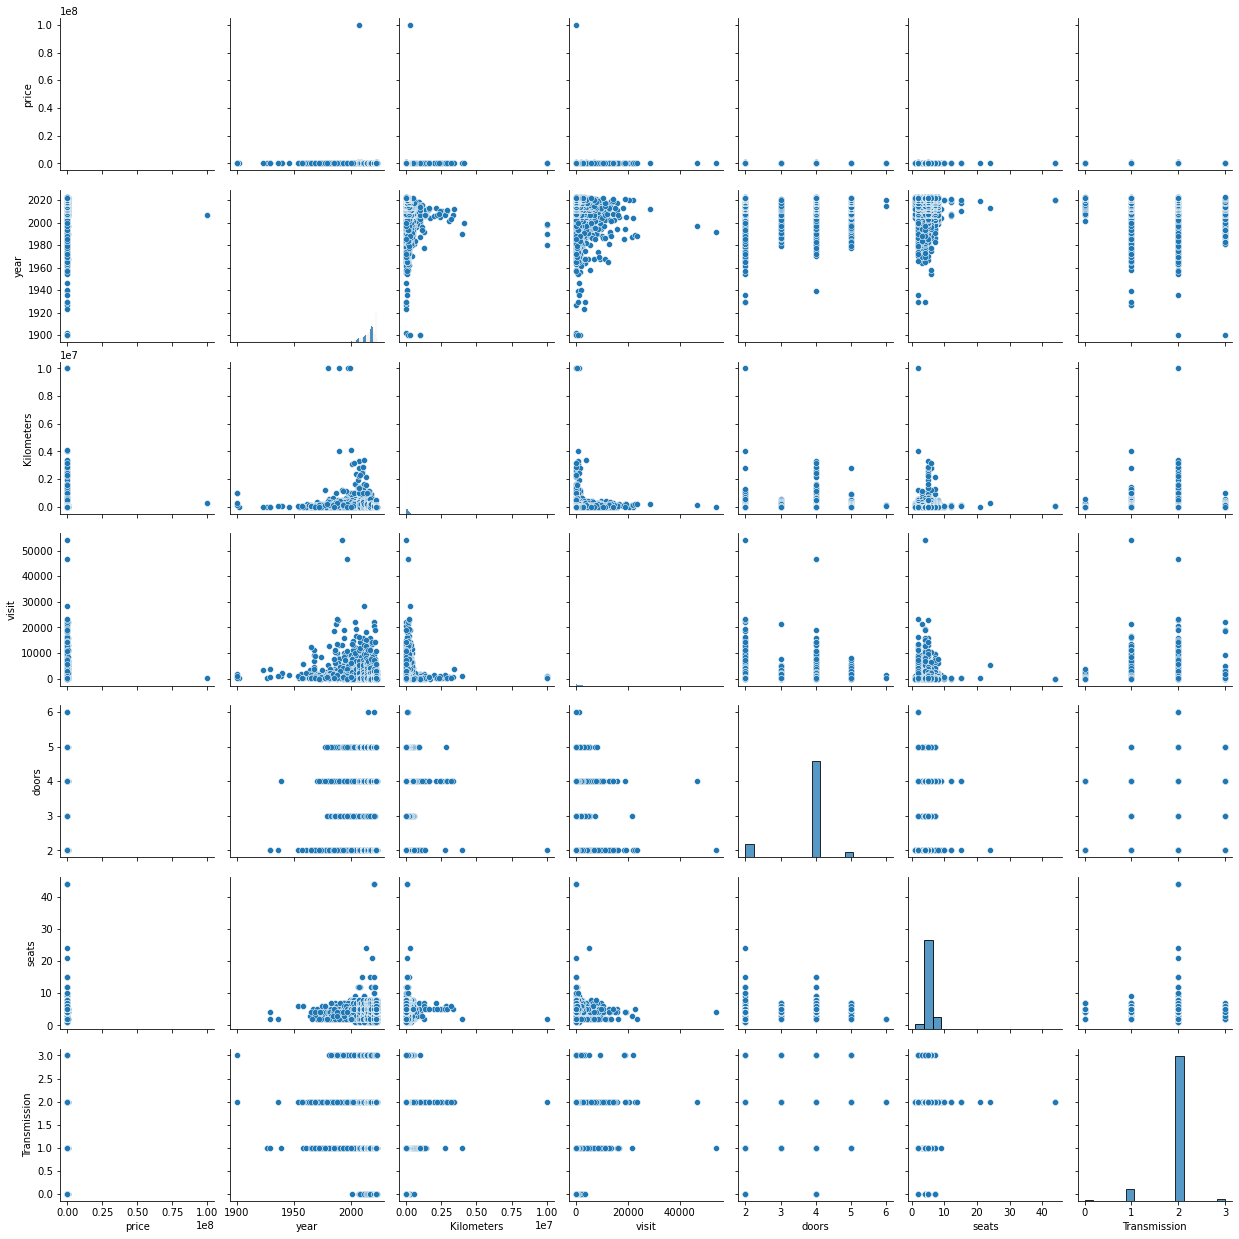

In [15]:
# To check the  correlation with pairplot of the numerical attributes 

sns.pairplot(CarD, vars = ["price", "year", "Kilometers", "visit","doors",'seats',"Transmission"], dropna = True)

In [16]:
#checking the missing values 

CarD.isnull().sum()

city                0
title               1
price               0
saleby              0
make                0
year                0
condition           0
Kilometers          0
body                0
fueltype         3790
visit             802
doors           16747
seats           19697
Transmission     4004
dtype: int64

In [17]:
#Filling the missing values in numeric columns

from sklearn.impute import SimpleImputer
null_col =['visit','doors','seats','Transmission']

imputer = SimpleImputer(strategy='mean') 
CarD[null_col] = imputer.fit_transform(CarD[null_col])

In [18]:
CarD.dropna(inplace=True)

In [19]:
CarD=CarD.convert_dtypes()

In [20]:
CarD.shape

(47552, 14)

In [21]:
# No missing data
CarD.isnull().sum()

city            0
title           0
price           0
saleby          0
make            0
year            0
condition       0
Kilometers      0
body            0
fueltype        0
visit           0
doors           0
seats           0
Transmission    0
dtype: int64

# Handling the outliers 

In [22]:
def outliers(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    Ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    
    return Ls

In [23]:

index_list=[]
for attribute in ['visit', 'doors','seats','Transmission', 'year', "price"]:
    index_list.extend(outliers(CarD, attribute))


In [24]:
# Define a funcation called "remove" which returns a cleaned dataframe without outliers

def remove(df, Ls):
    Ls=sorted(set(Ls))
    df=df.drop(Ls)
    return df

In [25]:
CarD=remove(CarD, index_list)

In [26]:
CarD.shape

(29284, 14)

In [27]:
CarD.describe()

price          year    Kilometers         visit         doors  \
count   29284.000000  29284.000000  2.928400e+04  29284.000000  29284.000000   
mean    36840.804876   2017.708851  7.639757e+04     95.982105      3.926506   
std     23654.130756      4.288664  8.315778e+04    127.693510      0.093207   
min         0.000000   2001.000000  0.000000e+00      0.000000      3.808302   
25%     19500.000000   2016.000000  1.253000e+03      9.000000      3.808302   
50%     32999.000000   2018.000000  5.873350e+04     39.000000      4.000000   
75%     52910.000000   2022.000000  1.200000e+05    131.000000      4.000000   
max    106430.000000   2023.000000  2.879718e+06    604.000000      4.000000   

              seats  Transmission  
count  29284.000000       29284.0  
mean       5.036943           2.0  
std        0.042026           0.0  
min        5.000000           2.0  
25%        5.000000           2.0  
50%        5.000000           2.0  
75%        5.084750           2.0  
max        5.084750           2.0

In [28]:
aggfuncs = [ 'count', 'sum', 'sem', 'skew', 'mean', 'min', 'max', 'std', 'quantile', 'nunique', 'mad', 'size', pd.Series.mode, 'var', 'unique']
CarD.groupby('condition', dropna=False)['price'].agg(aggfuncs).head(3)


count        sum          sem      skew          mean  min  \
condition                                                                    
damaged             9      59750  3242.874430  1.666481   6638.888889    0   
lease_takeover     22     951821  7573.230130  0.240328  43264.590909    0   
new              7120  389053606   304.134457 -0.727696  54642.360393    0   

                   max           std  quantile  nunique           mad  size  \
condition                                                                     
damaged          27000   9728.623290    3500.0        8   7382.716049     9   
lease_takeover  101000  35521.597955   37750.0       17  29882.334711    22   
new             106430  25662.893604   59156.0     4245  19555.279541  7120   

               mode                var  \
condition                                
damaged           0    94646111.111111   
lease_takeover    0  1261783921.300866   
new               0   658584108.121817   

                                                           unique  
condition                                                          
damaged            [3500, 4000, 0, 27000, 1000, 950, 19500, 3800]  
lease_takeover  [38000, 0, 32000, 37500, 99999, 99000, 275, 69...  
new             [0, 31695, 27997, 23989, 42400, 51989, 75730, ...

In [29]:
for col in CarD.columns:
    print(col,":",CarD[col].nunique())
    print(CarD[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

city : 12
Calgary                 8815
City of Toronto         8543
Ottawa                  5354
Delta/Surrey/Langley    1488
Gatineau                1063
Name: city, dtype: Int64

********************

title : 20775
2022 Ram 1500 Classic WARLOCK          179
2022 Ram 1500 Classic NIGHT EDITION    153
2022 Ram 1500 SPORT                    131
 2022 Ford F-150 XLT                   109
 2022 Ram 1500 Classic Warlock          92
Name: title, dtype: Int64

********************

price : 9415
0        1673
24995      97
29995      93
14995      90
29990      88
Name: price, dtype: Int64

********************

saleby : 2
dealer    25743
owner      3541
Name: saleby, dtype: Int64

********************

make : 50
Ford         3638
Ram          3106
Toyota       2079
Jeep         1900
Chevrolet    1848
Name: make, dtype: Int64

********************

year : 23
2022    6993
2018    3297
2019    3129
2017    2480
2020    2072
Name: year, dtype: Int64

********************

condition : 5
used     

In [30]:
CarD.isnull().sum()

city            0
title           0
price           0
saleby          0
make            0
year            0
condition       0
Kilometers      0
body            0
fueltype        0
visit           0
doors           0
seats           0
Transmission    0
dtype: int64

<AxesSubplot:title={'center':'Average car price by Year'}, xlabel='year'>

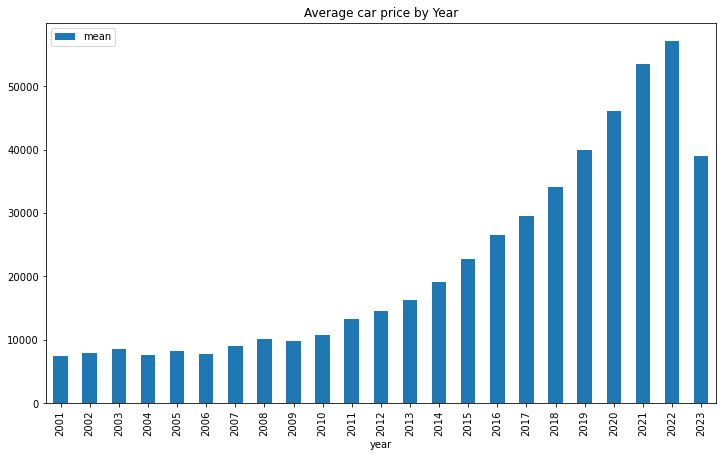

In [31]:
aggfuncs = [ 'mean']
pv1=CarD.groupby('year')['price'].agg(aggfuncs)
pv1.plot(kind='bar',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

<AxesSubplot:title={'center':'Average car price by Maker'}, xlabel='make'>

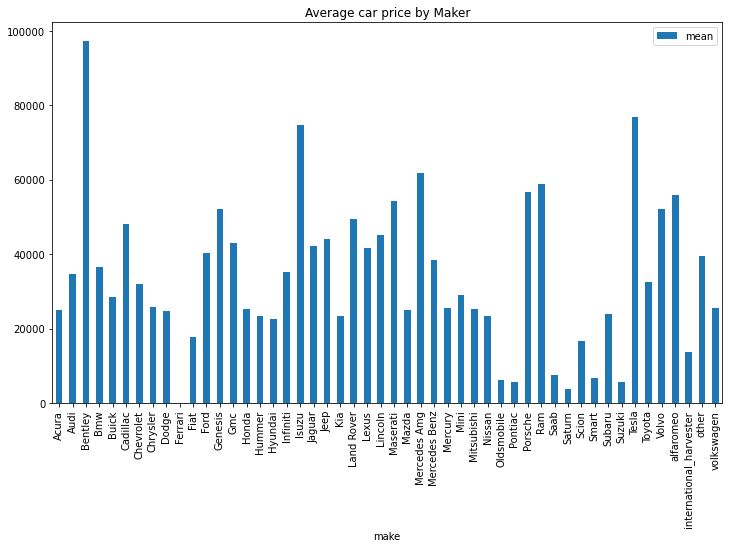

In [32]:
aggfuncs = [ 'mean']
pv1=CarD.groupby('make')['price'].agg(aggfuncs)
pv1.plot(kind='bar',linewidth=4.5,figsize=(12,7),title='Average car price by Maker')

array([<AxesSubplot:ylabel='mean'>], dtype=object)

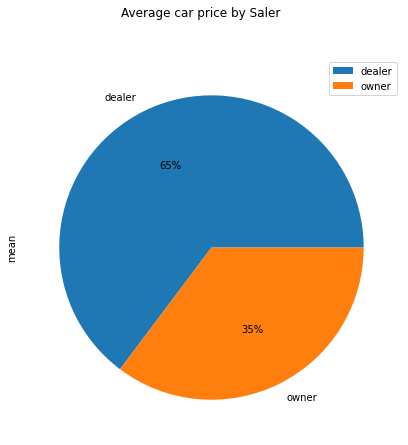

In [33]:
aggfuncs = [ 'mean']
pv1=CarD.groupby('saleby')['price'].agg(aggfuncs)
pv1.plot(kind='pie',figsize=(12,7),autopct='%1.0f%%',subplots=True,title='Average car price by Saler')

array([<AxesSubplot:ylabel='max'>], dtype=object)

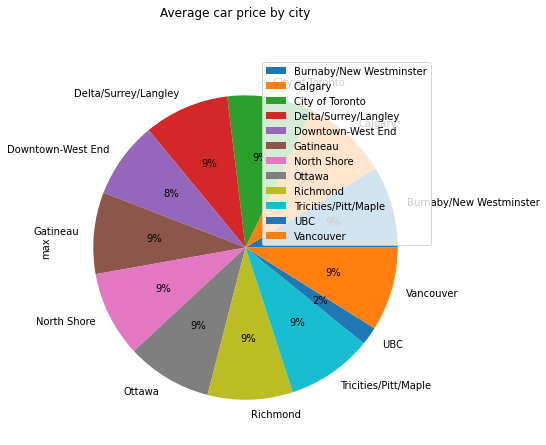

In [34]:
aggfuncs = [ 'max']
pv1=CarD.groupby('city')['price'].agg(aggfuncs)
pv1.plot(kind='pie',figsize=(12,7),autopct='%1.0f%%',subplots=True,title='Average car price by city')

array([<AxesSubplot:title={'center':'max'}, xlabel='condition'>],
      dtype=object)

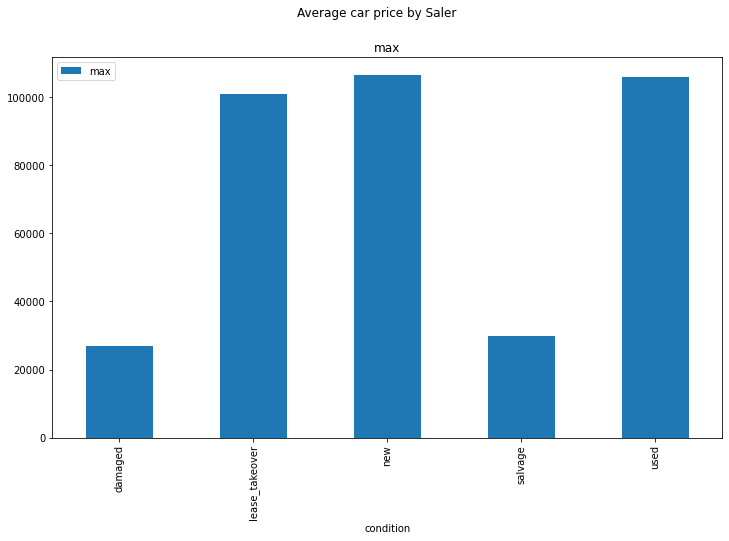

In [35]:
aggfuncs = [ 'max']
pv1=CarD.groupby('condition')['price'].agg(aggfuncs)
pv1.plot(kind='bar',figsize=(12,7),subplots=True,title='Average car price by Saler')

array([<AxesSubplot:xlabel='body'>], dtype=object)

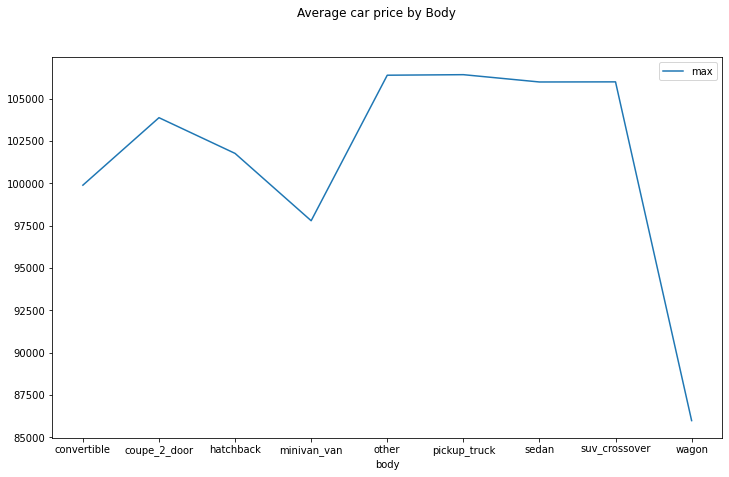

In [36]:


aggfuncs = [ 'max']
pv1=CarD.groupby('body')['price'].agg(aggfuncs)
pv1.plot(kind='line',figsize=(12,7),subplots=True,title='Average car price by Body')

array([<AxesSubplot:xlabel='Kilometers'>], dtype=object)

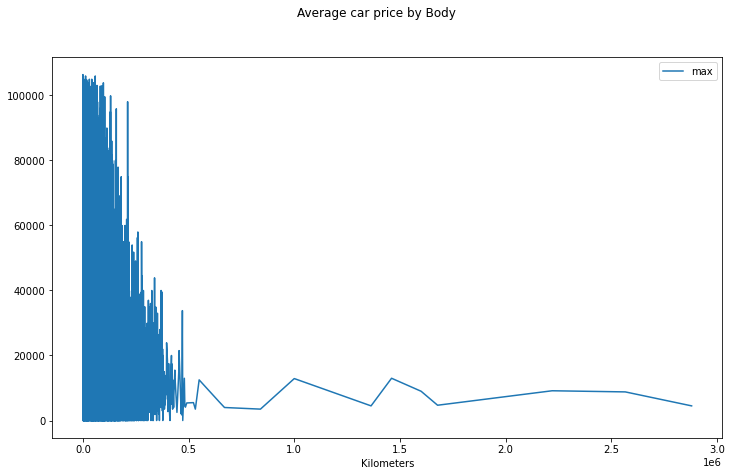

In [37]:
aggfuncs = [ 'max']
pv1=CarD.groupby('Kilometers')['price'].agg(aggfuncs)
pv1.plot(kind='line',figsize=(12,7),subplots=True,title='Average car price by Body')

array([<AxesSubplot:title={'center':'mean'}, xlabel='fueltype'>],
      dtype=object)

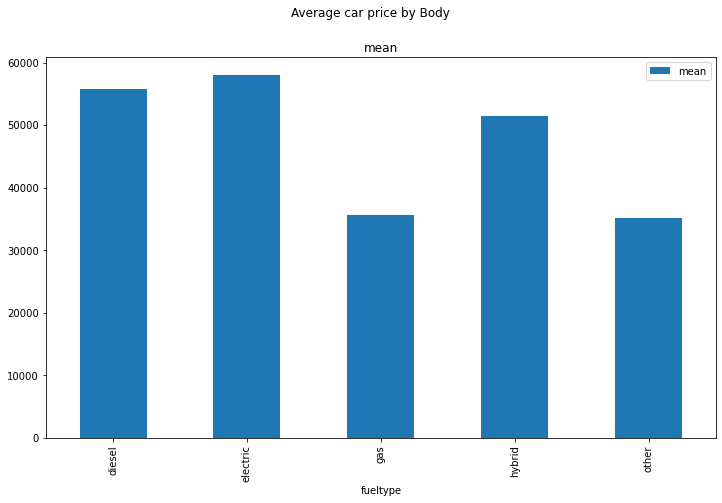

In [38]:
aggfuncs = [ 'mean']
pv1=CarD.groupby('fueltype')['price'].agg(aggfuncs)
pv1.plot(kind='bar',figsize=(12,7),subplots=True,title='Average car price by Body')

array([<AxesSubplot:ylabel='price'>], dtype=object)

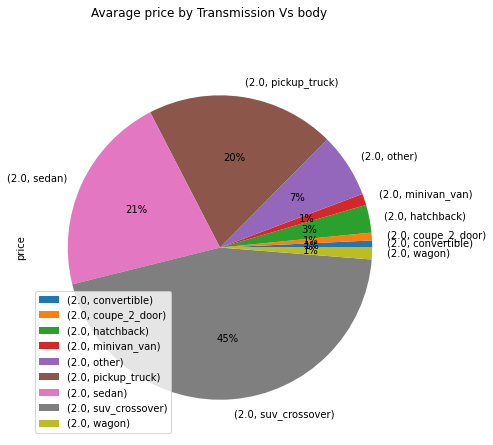

In [39]:
pv2=pd.pivot_table(CarD, index=['Transmission', 'body'],values = ['price'],aggfunc = 'count') 
pv2.plot(kind='pie',figsize=(12,7),autopct='%1.0f%%',title='Avarage price by Transmission Vs body', subplots=True)

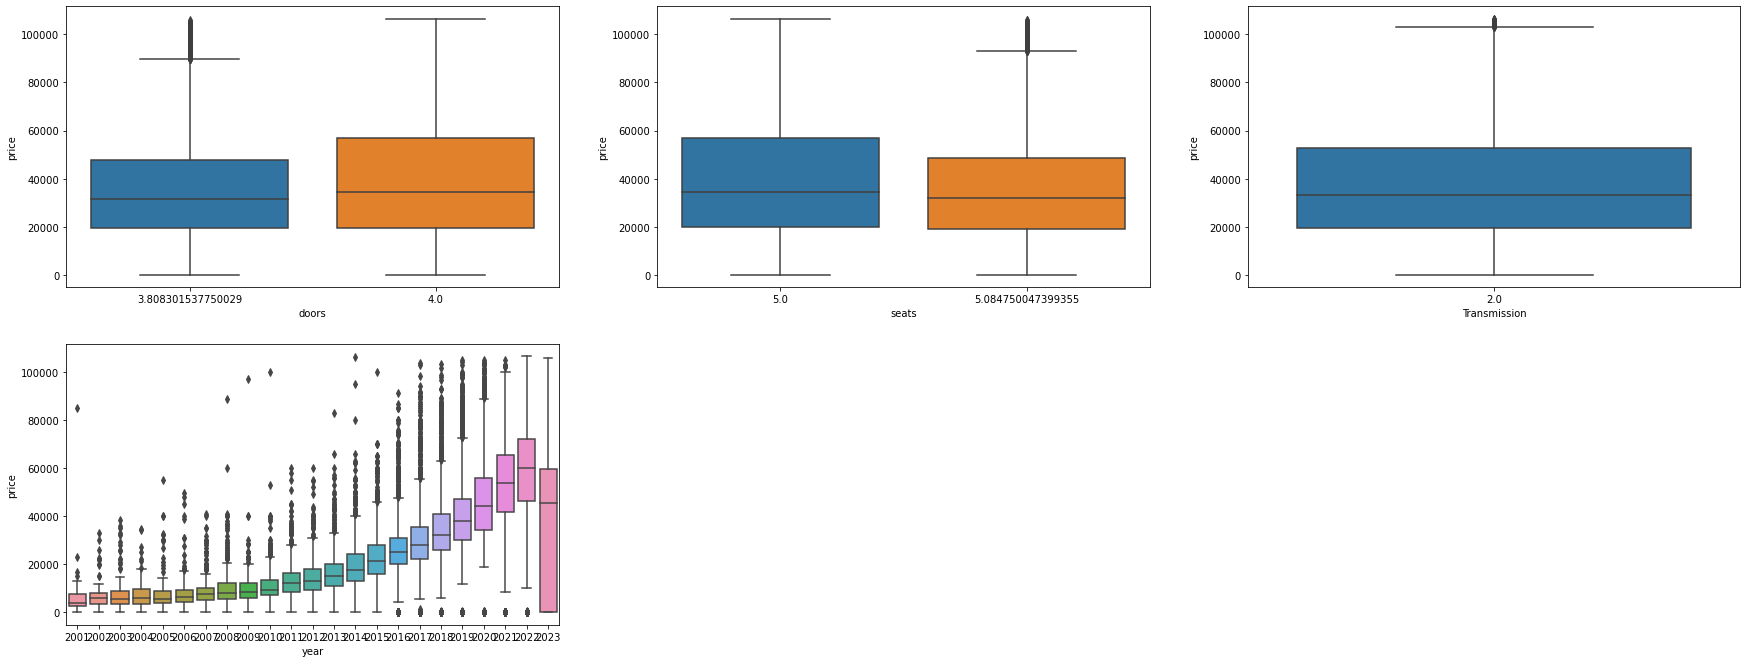

In [40]:
plt.figure(figsize=(30,30))
columns = [ 'doors', 'seats', 'Transmission','year']
i=0
for col in columns:
    i=i+1
    plt.subplot(5,3,i)
    sns.boxplot(x=col,y='price',data=CarD)
plt.show()

# Correlation table after removing the outliers 

# Spliting the data set  to train, test and validation

In [41]:
#Spliting the dataset to training, validation and testing 

train_val_df,test_df=train_test_split(CarD, test_size=0.20)
train_df, val_df=train_test_split(CarD,test_size=0.20)

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (23427, 14)
val_df.shape: (5857, 14)
test_df.shape: (5857, 14)


In [42]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categoric_cols = CarD.select_dtypes('string').columns.tolist()


In [43]:
#identifying the target column

input_cols=list(train_df[[ 'price', 'city','saleby','doors','make',  'year', 'condition', 'Kilometers','body',  'visit', 'seats','Transmission','fueltype', 'title']])
print(input_cols)

['price', 'city', 'saleby', 'doors', 'make', 'year', 'condition', 'Kilometers', 'body', 'visit', 'seats', 'Transmission', 'fueltype', 'title']


In [44]:

print(categoric_cols)

['city', 'title', 'saleby', 'make', 'condition', 'body', 'fueltype']


In [45]:
# print target column
target_col=list(train_df[['price']])
print(target_col)

['price']


In [46]:
print(numeric_cols)

['price', 'year', 'Kilometers', 'visit', 'doors', 'seats', 'Transmission']


In [47]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [48]:
test_inputs = test_df[input_cols]
test_targets = val_df[target_col]

In [49]:
val_inputs =val_df[input_cols]
val_targets = val_df[target_col]

In [50]:
CarD.price.skew()

0.5190125669244647

# Scalling numerical features to a (0,1) range

In [51]:
# MinMaxScaler from sklear.preprocessing to scale values to the(0,1) range.

scaler=MinMaxScaler()

In [52]:
#Fiting the scaler to the data, i.e compute the range of values for each numeric coumn

scaler.fit(CarD[numeric_cols])

MinMaxScaler()

In [53]:

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [54]:
#cheking the descriptve value of train_inputs 

train_inputs.describe()



price         doors          year    Kilometers         visit  \
count  23427.000000  23427.000000  23427.000000  23427.000000  23427.000000   
mean       0.346500      0.617663      0.759180      0.026646      0.159906   
std        0.222625      0.485969      0.195279      0.029466      0.212622   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.183106      0.000000      0.681818      0.000353      0.014901   
50%        0.310063      1.000000      0.772727      0.020459      0.066225   
75%        0.497886      1.000000      0.954545      0.041729      0.218543   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              seats  Transmission  
count  23427.000000       23427.0  
mean       0.436249           0.0  
std        0.495930           0.0  
min        0.000000           0.0  
25%        0.000000           0.0  
50%        0.000000           0.0  
75%        1.000000           0.0  
max        1.000000           0.0

# Standardization

In [55]:
scale=StandardScaler()

In [56]:
scaler.fit_transform(CarD[numeric_cols])

array([[5.44959128e-02, 1.81818182e-01, 6.49369140e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.28854646e-02, 1.81818182e-01, 7.29238071e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.25500329e-02, 0.00000000e+00, 1.11121992e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.82861975e-01, 9.54545455e-01, 7.98689316e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.32011651e-01, 9.54545455e-01, 8.33414939e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.16809170e-01, 9.54545455e-01, 3.47256224e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Encoding Categorical Variables 

In [57]:
#OnehotEncoding invoves adding a new binary (0/1) column for each uniue category of a categorical column

x=CarD[categoric_cols].nunique()
print(x)

city            12
title        20775
saleby           2
make            50
condition        5
body             9
fueltype         5
dtype: int64


In [58]:
# Using Onehotencoding using the OneHotEncoder class from sklearn.preprocessing 

encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [59]:
# We can generate column names for each individual category suing get_feature_names.
OneHotEncoder(handle_unknown='ignore')


OneHotEncoder(handle_unknown='ignore')

In [60]:
encoder.fit(CarD[categoric_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [61]:
encoder.categories_

[array(['Burnaby/New Westminster', 'Calgary', 'City of Toronto',
        'Delta/Surrey/Langley', 'Downtown-West End', 'Gatineau',
        'North Shore', 'Ottawa', 'Richmond', 'Tricities/Pitt/Maple', 'UBC',
        'Vancouver'], dtype=object),
 array(['  2014 Hyundai Sonata for sale . Everything power, Bluetooth ',
        ' 2.4L 4 cyl. Limited Edition Pano/Leather/Navi',
        ' 2001 Lexus RX 300 Luxury w/ Sunroof / Leather / Heated Seats',
        ..., 'saturn astra ', 'sell Audi s7', 'suv'], dtype=object),
 array(['dealer', 'owner'], dtype=object),
 array(['Acura', 'Audi', 'Bentley', 'Bmw', 'Buick', 'Cadillac',
        'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'Fiat', 'Ford',
        'Genesis', 'Gmc', 'Honda', 'Hummer', 'Hyundai', 'Infiniti',
        'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln',
        'Maserati', 'Mazda', 'Mercedes Amg', 'Mercedes Benz', 'Mercury',
        'Mini', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche',
        'Ram', 

In [62]:
encoded_cols =list(encoder.get_feature_names_out(categoric_cols))
print(encoded_cols)

['city_Burnaby/New Westminster', 'city_Calgary', 'city_City of Toronto', 'city_Delta/Surrey/Langley', 'city_Downtown-West End', 'city_Gatineau', 'city_North Shore', 'city_Ottawa', 'city_Richmond', 'city_Tricities/Pitt/Maple', 'city_UBC', 'city_Vancouver', 'title_  2014 Hyundai Sonata for sale . Everything power, Bluetooth ', 'title_ 2.4L 4 cyl. Limited Edition Pano/Leather/Navi', 'title_ 2001 Lexus RX 300 Luxury w/ Sunroof / Leather / Heated Seats', 'title_ 2002 Acura TL Type-S LOADED! VERY NICE! INSPECTED! FREE BCAA &amp; WRNTY! IN HOUSE FINANCE!', 'title_ 2002 Honda CR-V EX 4WD', 'title_ 2002 Porsche Boxster 2.7L RWD Convertible Coupe ONLY 65KM HARDTOP', 'title_ 2002 Volkswagen New Beetle 2dr Cpe GLS-L EXTRA CLEAN-LEATHER-SUNROOF-ALLOYS', 'title_ 2003 Hummer H2 4dr Wgn - No Accidents', 'title_ 2003 Mercedes-Benz SL55 w/ SUPERCHARGED / CONVERTIBLE / LOW KMS', 'title_ 2003 Toyota 4Runner SPORT-NO ACCIDENT CLAIMS/LOW KILOMETRES', 'title_ 2003 Volkswagen Jetta GLS 2.0L WAGON AUTO LEATHER

In [63]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categoric_cols].fillna("Unknown"))
val_inputs[encoded_cols]=encoder.transform(val_inputs[categoric_cols].fillna("Unknown"))
test_inputs[encoded_cols]=encoder.transform(test_inputs[categoric_cols].fillna("Unknown"))

C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
C:\Users\tirut\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [64]:
## Train_inputs = X_train, train_targets = Y_train  and test_inputs = X_test ,  and test_target = Y_test )
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)


train_inputs: (23427, 20872)
train_targets: (23427, 1)
val_inputs: (5857, 20872)
val_targets: (5857, 1)
test_inputs: (5857, 20872)
test_targets: (5857, 1)


In [65]:
!pip install pyarrow --quiet

In [66]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [67]:
pd.DataFrame(train_targets).to_parquet('train_inputs.parquet')
pd.DataFrame(val_targets).to_parquet('val_inputs.parquet')
pd.DataFrame(test_targets).to_parquet('test_inputs.parquet')                                      

# Linear regression model 

In [68]:
X_train_inputs=(train_inputs[encoded_cols + numeric_cols])
X_val_inputs=(val_inputs[encoded_cols + numeric_cols])
X_test_inputs=(test_inputs[encoded_cols + numeric_cols])


In [69]:
#Modelling/Logistic Regression

regr=linear_model.LinearRegression()

In [70]:
regr.fit(X_train_inputs, train_targets)

LinearRegression()

In [71]:
# predication on training data
pred=regr.predict(X_train_inputs)

In [72]:
error_score=metrics.r2_score(train_targets, pred)

In [73]:
regr.coef_.tolist()

[[-4682.767360131287,
  -4682.767360130536,
  -4682.767360130119,
  -4682.767360129996,
  -4682.7673601308215,
  -4682.76736013078,
  -4682.76736013068,
  -4682.767360130878,
  -4682.7673601305905,
  -4682.767360130934,
  12084.245068923488,
  -4682.7673601305805,
  26.66772887023175,
  -91054.95194655207,
  -24244.653792290246,
  -7.198672147590994,
  79.45005806626598,
  1033.5926957122688,
  83.48961043543397,
  -2248.8470148713573,
  153.28949851450153,
  13048.510300362304,
  83.48961043559657,
  -20.66841941860503,
  -20.668419418608863,
  -60.4275016581815,
  -18130.705299085734,
  -2248.8470148715974,
  21.176692002237814,
  21.176692002247783,
  9831.37497808198,
  -43.26637057330054,
  83.4896104355956,
  -18.897414271787387,
  -51.703379524102445,
  79.45005806629896,
  39446.29781464017,
  -18.89741427190534,
  -43.26637057323609,
  -43.26637057355482,
  -60.42750165816442,
  -60.42750165809668,
  54550.20788702318,
  -51.70337952366541,
  -51.70337952371099,
  79.450058066

In [74]:
regr.intercept_.tolist()



[-81357.55721370497]

In [75]:
regr.coef_




array([[-4.68276736e+03, -4.68276736e+03, -4.68276736e+03, ...,
        -5.49107426e-11, -1.14596332e-10,  0.00000000e+00]])

In [76]:
print("\t Linear Regression \t")

print("R Squared Error      : ", metrics.r2_score(train_targets, pred))
print("Mean Absolute Error :", metrics.mean_absolute_error(train_targets, pred))



	 Linear Regression 	
R Squared Error      :  1.0
Mean Absolute Error : 3.726599703733669e-10


In [77]:
print("Accuracy on traing set: ",  regr.score(X_train_inputs, train_targets))
print("Accuracy on test set: ",  regr.score(X_test_inputs, test_targets))
print("Accuracy on val set: ",  regr.score(X_val_inputs, val_targets))

Accuracy on traing set:  1.0
Accuracy on test set:  -0.9761554486089798
Accuracy on val set:  0.99504569147265


In [78]:
n = len(regr.coef_.tolist())
pd.DataFrame({
    'Attributes':(numeric_cols + encoded_cols),
    'predicters':regr.coef_.tolist()[0]})

Attributes    predicters
0                  price -4.682767e+03
1                   year -4.682767e+03
2             Kilometers -4.682767e+03
3                  visit -4.682767e+03
4                  doors -4.682767e+03
...                  ...           ...
20860    fueltype_diesel  1.286935e-10
20861  fueltype_electric -6.093615e-11
20862       fueltype_gas -5.491074e-11
20863    fueltype_hybrid -1.145963e-10
20864     fueltype_other  0.000000e+00

[20865 rows x 2 columns]

In [79]:
# Visualizing the  linear regression coef
n = len(regr.coef_.tolist())
weight_df = pd.DataFrame({
    'feature':(numeric_cols + encoded_cols),
    'weight':regr.coef_.tolist()[0]})

<AxesSubplot:xlabel='weight', ylabel='feature'>

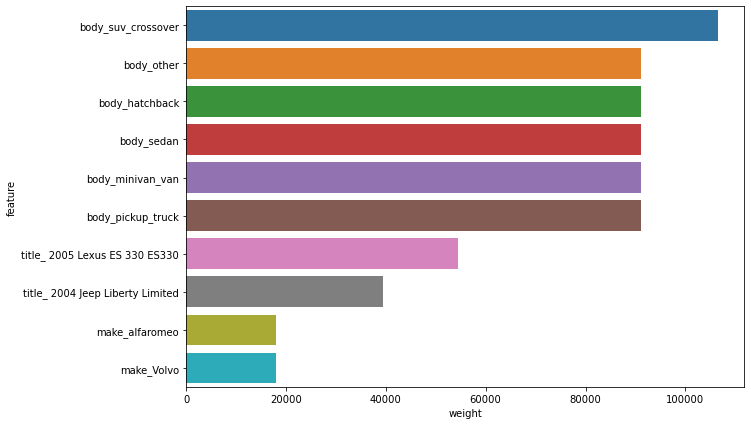

In [80]:
plt.figure(figsize=(10,7))

sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x = 'weight', y = 'feature')

# Decision Tree 

In [81]:
dt=DecisionTreeRegressor(max_depth = 5)

dt.fit(X_train_inputs, train_targets)


DecisionTreeRegressor(max_depth=5)

In [82]:
ped=dt.predict(X_train_inputs)


In [83]:
print(ped)

[27444.9537037  40706.33010753 40706.33010753 ... 40706.33010753
 29881.95331695 13088.64330413]


In [84]:
# R Squared Error for train, test and validation


print("R Squared Error      : ", metrics.r2_score(train_targets, ped))
print("Mean Absolute Error :", metrics.mean_absolute_error(train_targets, ped))



R Squared Error      :  0.9986748728235472
Mean Absolute Error : 697.665173467046


# Random Forest Regressor 

In [85]:
rf_reg=RandomForestRegressor(n_estimators = 100, random_state = 42)


In [86]:
rf_reg.fit(X_train_inputs, train_targets)
pred1=rf_reg.predict(X_train_inputs)



C:\Users\tirut\AppData\Local\Temp/ipykernel_26372/3180109861.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train_inputs, train_targets)


In [87]:
print(pred1)

[26888.   40994.99 40499.62 ... 39902.52 30979.11 12500.  ]


In [88]:
# R Squared Error for train, test and validation
print("R Squared Error      : ", metrics.r2_score(train_targets, pred1))
print("Mean Absolute Error :", metrics.mean_absolute_error(train_targets, pred1))





R Squared Error      :  0.999999977244738
Mean Absolute Error : 1.1621099585947732
